Machine Learning Pipeline

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [2]:
df.shape

(150, 5)

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [5]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


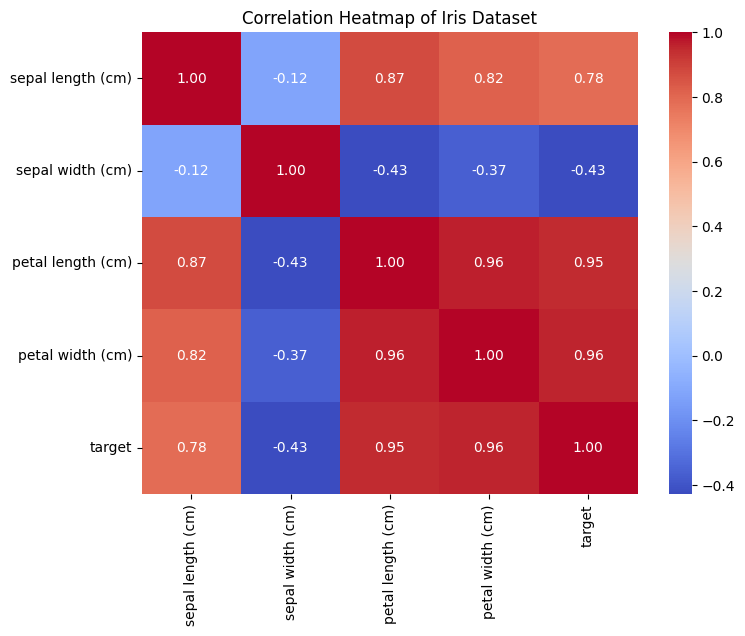

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_256\3738454945.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y=feature, palette='Set3')


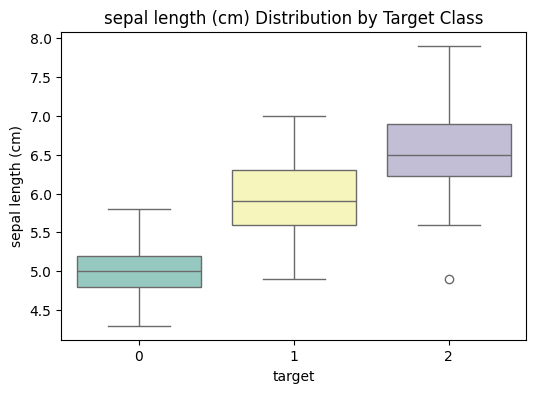

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_256\3738454945.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y=feature, palette='Set3')


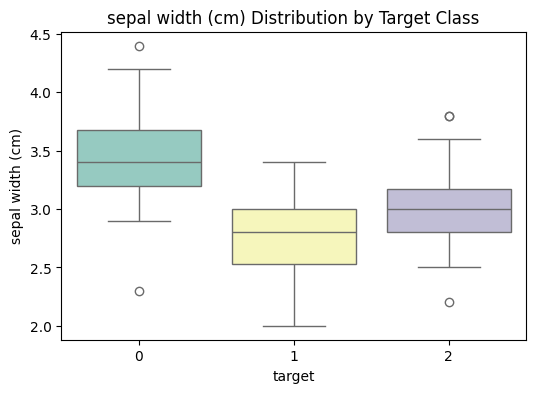

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_256\3738454945.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y=feature, palette='Set3')


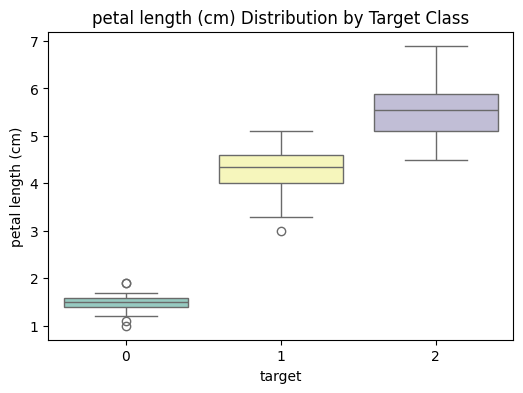

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_256\3738454945.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y=feature, palette='Set3')


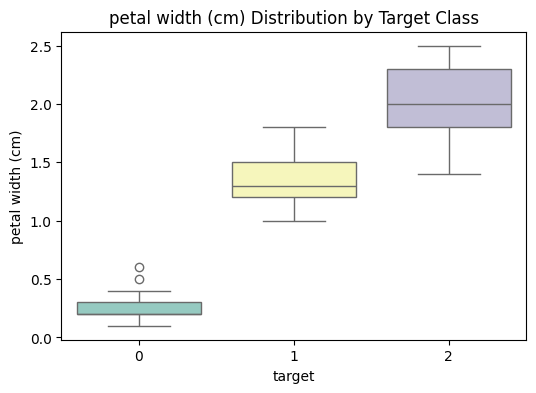

In [8]:
for feature in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='target', y=feature, palette='Set3')
    plt.title(f'{feature} Distribution by Target Class')
    plt.show()

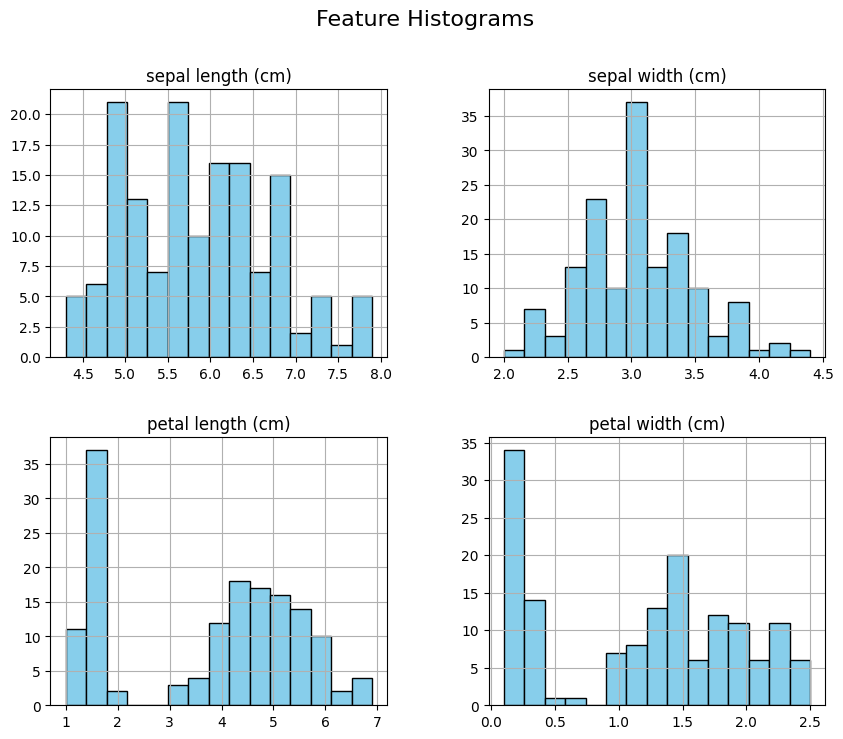

In [9]:
df.iloc[:, :-1].hist(figsize=(10, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Feature Histograms', fontsize=16)
plt.show()

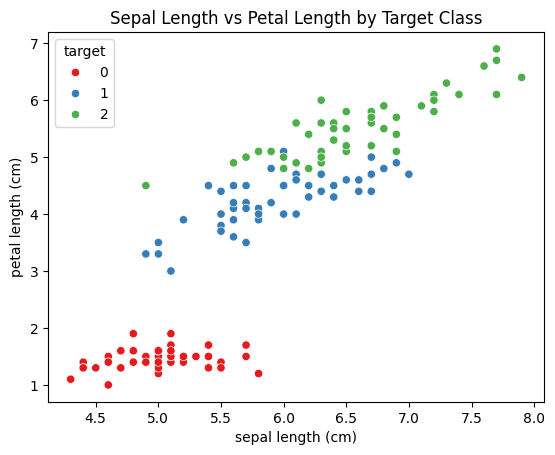

In [10]:
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='target', palette='Set1')
plt.title('Sepal Length vs Petal Length by Target Class')
plt.show()

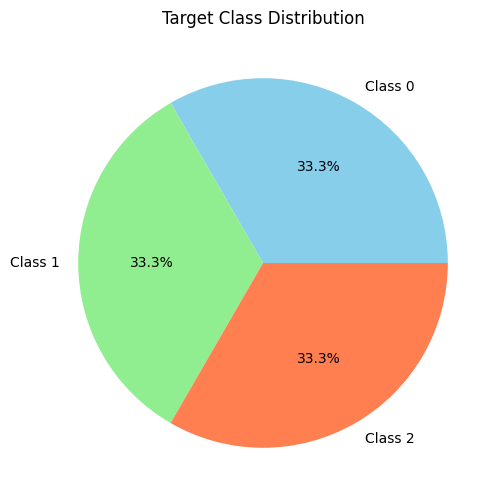

In [11]:
import matplotlib.pyplot as plt


target_counts = df['target'].value_counts()
target_labels = [f'Class {i}' for i in target_counts.index]

plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'coral'])
plt.title('Target Class Distribution')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_256\3493577685.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='target', y='petal width (cm)', palette='muted')


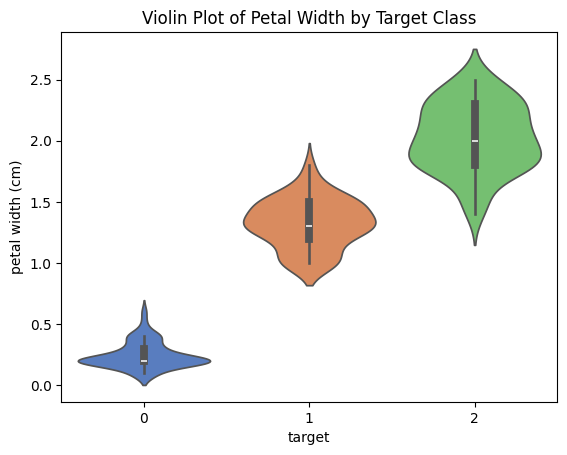

In [12]:
sns.violinplot(data=df, x='target', y='petal width (cm)', palette='muted')
plt.title('Violin Plot of Petal Width by Target Class')
plt.show()

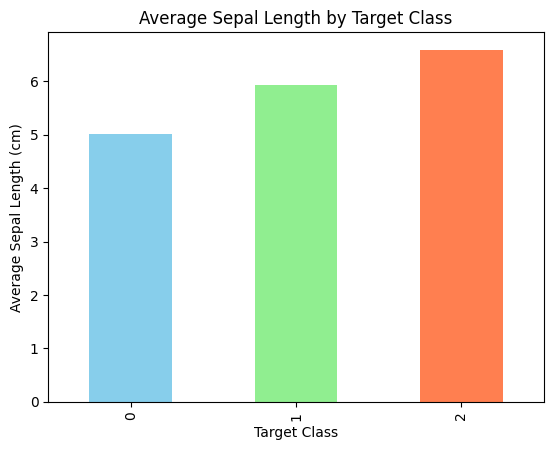

In [13]:
df.groupby('target')['sepal length (cm)'].mean().plot(kind='bar', color=['skyblue', 'lightgreen', 'coral'])
plt.title('Average Sepal Length by Target Class')
plt.xlabel('Target Class')
plt.ylabel('Average Sepal Length (cm)')
plt.show()

In [14]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

Imputing

In [15]:
df.fillna(df.mean(), inplace=True)


Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

Encoding

In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_target = encoder.fit_transform(df[['target']])

PCA

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

Train Test Split

In [19]:
from sklearn.model_selection import train_test_split as tts

X = df.iloc[:, :-1]  # Features
y = df['target']     # Target

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

Training Model

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [22]:
y_pred = model.predict(X_test)

In [23]:
y_pred.shape

(30,)

Evaluating

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [25]:
accuracy

1.0

In [26]:
conf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [28]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Train Perceptron

In [29]:
from sklearn.linear_model import Perceptron

# Initialize and train the perceptron model
perceptron = Perceptron(random_state=42)
perceptron.fit(X_train, y_train)

# Make predictions on the test set
y_pred_perceptron = perceptron.predict(X_test)

# Evaluate the perceptron model
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)
report_perceptron = classification_report(y_test, y_pred_perceptron)

print(f"Perceptron Accuracy: {accuracy_perceptron}")
print(f"Perceptron Confusion Matrix:\n{conf_matrix_perceptron}")
print(f"Perceptron Classification Report:\n{report_perceptron}")

Perceptron Accuracy: 0.9666666666666667
Perceptron Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Perceptron Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



Train Another Classification Model

In [30]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm}")
print(f"SVM Confusion Matrix:\n{conf_matrix_svm}")
print(f"SVM Classification Report:\n{report_svm}")

SVM Accuracy: 1.0
SVM Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

